# Narrative Flow of Men and Women



 ### Hypothesis:

Men and women discuss sociability and solidarity in different ways, i.e. in different contexts. (..) Solidarity and social relations were different in the men and women section of Birkenau; men and women recall them in different ways and contexts. In practice, this means that they are primed and followed by different topics in the narratives of men and women.

If the hypothesis is true:
- the story line (or narrative flow) leading to the discussion of sociability and solidarity is different in testimonies of men and women
- the most likely sequences of topics (to be named narrative pathway) leading to topics describing solidarity and sociability are different
- different amount of traffic is going through  similar pathways leading to solidarity and sociability
- different nodes (to be named priming topics) are preceding and following (to be named exit topics) topics of solidarity and sociability


Key research questions to be studied here:
- What are the major pathways between the memory of arrival to Birkenau and leaving from Birkenau?
- How are nodes related to solidarity (food sharing, aid giving) and social bonds (friends, social bonds, family) are situated along the major pathways? For women and men, are they peripheral or central? I.e. do a significant amount of narrative flow go towards them for men and women?
- What are the exit and priming topics for solidarity (food sharing, aid giving) and social bonds for men and women?
- How are these topics related to survival explanations?
- How is friendship related to aid giving for men and for women? What are the transitory topics between them?
- What are those topics that prime topics of solidarity and social bonds?
- Where did solidarity take place? In what contexts did solidarity take place?
- What topics do topics related to solidarity and social bonds prime for men and women?


In [4]:
import constants
import pandas as pd
import os
from IPython.display import display
import json
import pyemma
from tables import *
import sys; sys.path.insert(0, '..')
from markov_modelling.markov_utils import *

## Load the relevant data

Load interview

Set up the paths to data

Two different datasets were created. In Dataset 1, the topic 'social bonds' include 'friendship' as well; similarly the topic 'aid giving' includes 'food sharing'. In Dataset 2, 'friendship' and 'food sharing' are distinguished, and they are different topics.

First, load Dataset 1

In [5]:
input_directory = constants.output_data_markov_modelling
path = os.getcwd()
parent = os.path.abspath(os.path.join(path, os.pardir))
input_directory = parent +'/'+ constants.output_data_markov_modelling
data_set_1_w  = pyemma.load(input_directory+'complete_w'+'/'+'pyemma_model','simple')
data_set_1_m = pyemma.load(input_directory+'complete_m'+'/'+'pyemma_model','simple')
input_directory = parent +'/'+ constants.output_data_segment_keyword_matrix
features_df = pd.read_csv(input_directory+constants.output_segment_keyword_matrix_feature_index)
features_df = features_df.drop(columns=['Unnamed: 0','index'])

In [ ]:
Load Dataset 2

In [87]:
input_directory = 'data/output_aid_giving_sociability_expanded/output/markov_modelling/'

path = os.getcwd()
parent = os.path.abspath(os.path.join(path, os.pardir))
input_directory = parent +'/'+ input_directory
data_set_2_w  = pyemma.load(input_directory+'complete_w'+'/'+'pyemma_model','simple')
data_set_2_m = pyemma.load(input_directory+'complete_m'+'/'+'pyemma_model','simple')
input_directory = parent +'/'+ 'data/output_aid_giving_sociability_expanded/output//segment_keyword_matrix/'
features_df_2 = pd.read_csv(input_directory+constants.output_segment_keyword_matrix_feature_index)
features_df_2 = features_df_2.drop(columns=['Unnamed: 0','index'])


## Observation 1

### Qualitative description

For women, the main topic that primes the discussion of aid giving is the discussion of the living conditions. By contrast, the most important topic that primes aid giving for men is the discussion of forced labour activity. Solidarity took place in different contexts for men and women.

### Visualization

7 labels to show
6 labels to show


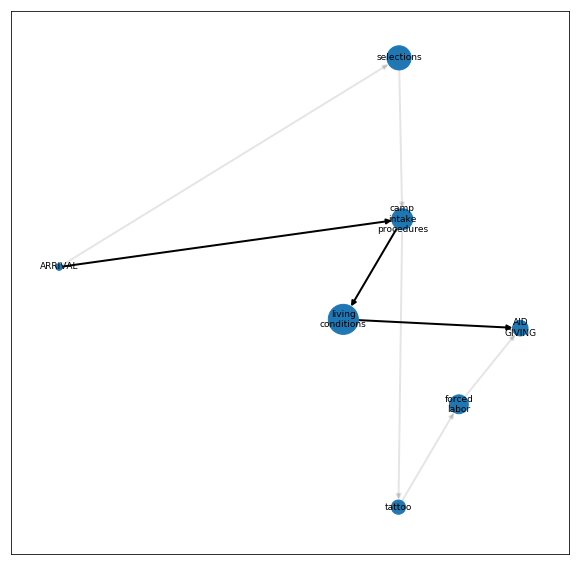

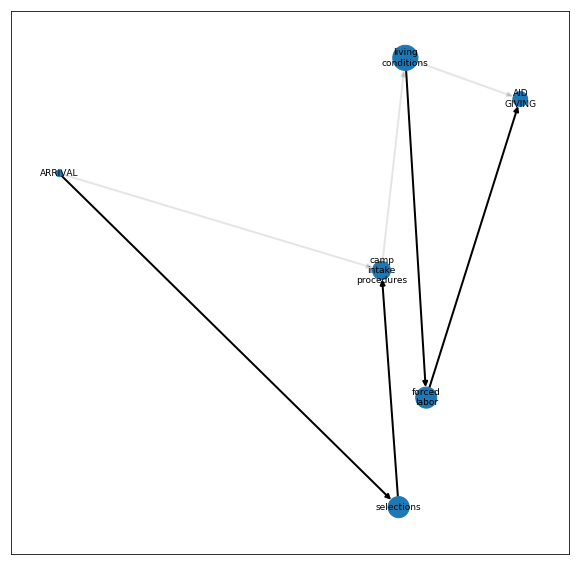

In [137]:
story_start = 'arrival'
story_end = 'aid giving'
flux = 0.1
visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 2

### Qualitative description

We can see a similar pattern as above.

### Visualization

7 labels to show
6 labels to show


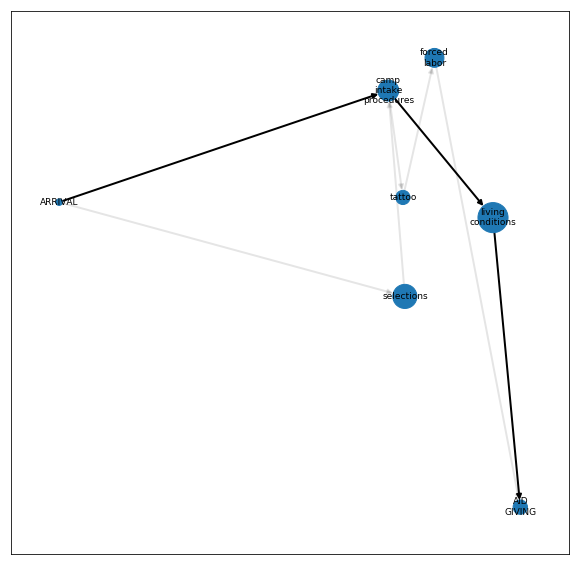

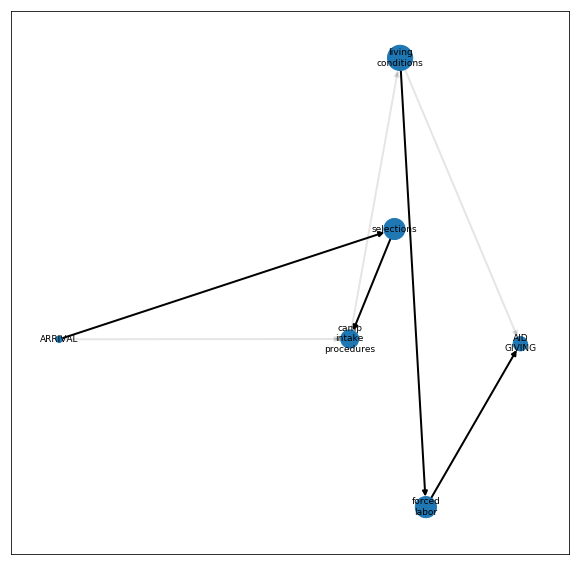

In [128]:
story_start = 'arrival'
story_end = 'food sharing'
flux = 0.15
visualize_most_important_paths(data_set_2_w,flux,features_df_2,story_start,story_end,None)
visualize_most_important_paths(data_set_2_m,flux,features_df_2,story_start,story_end,None)

## Observation 3

### Qualitative description

In narratives of women, aid giving is more likely to prime the discussion of friendship.

### Visualization

10 labels to show
17 labels to show


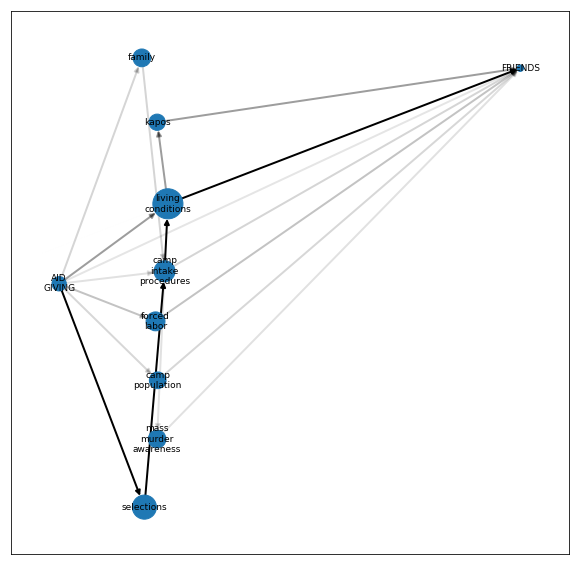

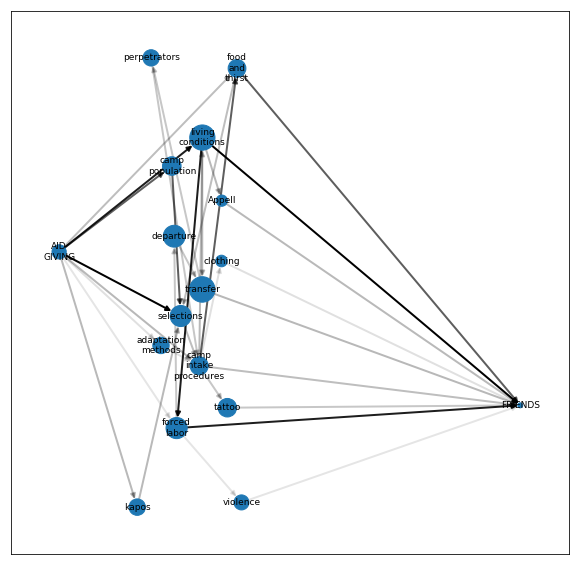

In [168]:
story_start = 'aid giving'
story_end = 'friends'
flux = 0.3
visualize_most_important_paths(data_set_2_w,flux,features_df_2,story_start,story_end,None)
visualize_most_important_paths(data_set_2_m,flux,features_df_2,story_start,story_end,None)

## Observation 4

### Qualitative description

Women discuss friendship mainly in the context of camp living conditions; by contrast men also include the discussion of forced labour; in narratives of women, aid giving is more likely to prime the discussion of friendship.

### Visualization

19 labels to show
20 labels to show


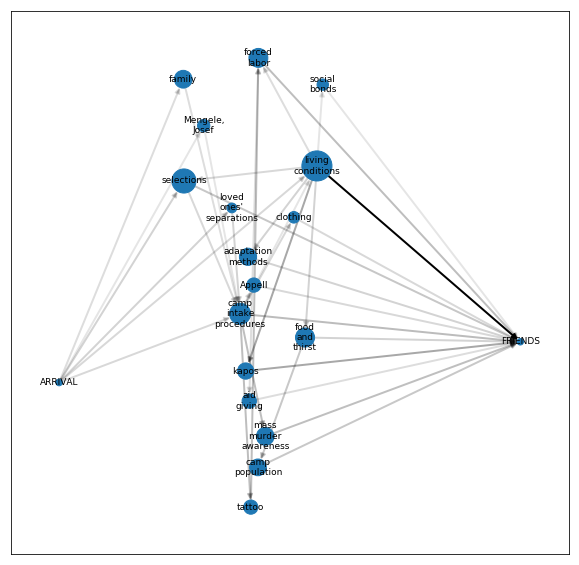

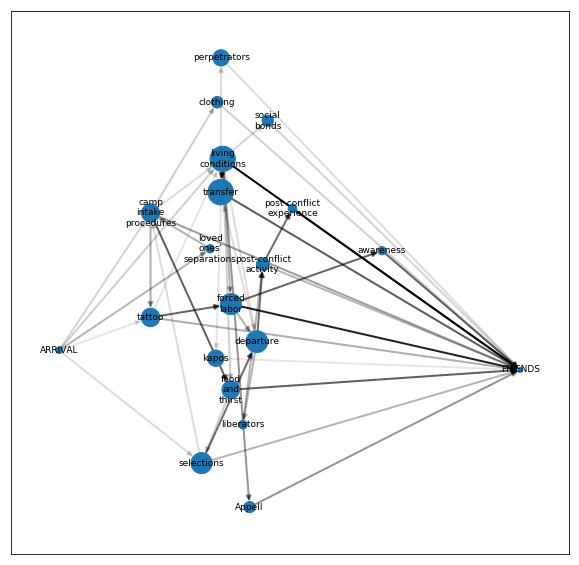

In [155]:
story_start = 'arrival'
story_end = 'friends'
flux = 0.55
visualize_most_important_paths(data_set_2_w,flux,features_df_2,story_start,story_end,None)
visualize_most_important_paths(data_set_2_m,flux,features_df_2,story_start,story_end,None)

## Observation 5

### Qualitative description

In narratives of women, friends and survival explanation are closely connected with each other

## Visualization

7 labels to show
11 labels to show


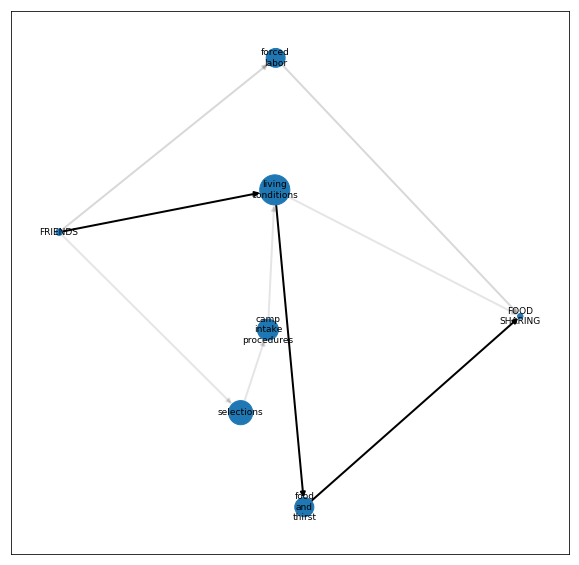

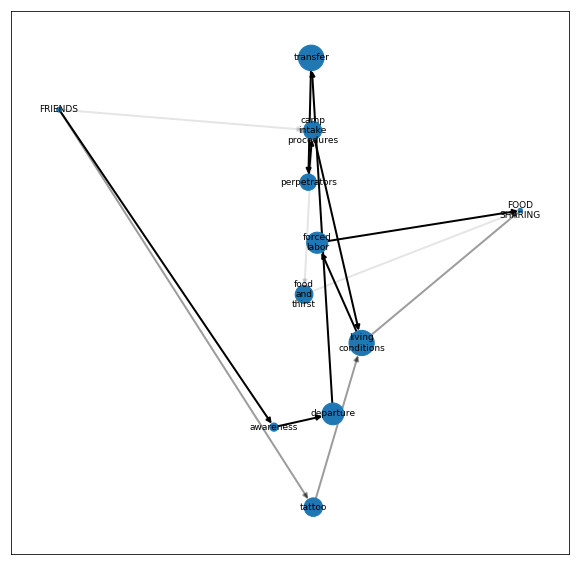

In [198]:
story_start = 'friends'
story_end = 'survival explanations'
flux = 0.12
visualize_most_important_paths(data_set_2_w,flux,features_df_2,story_start,story_end,None)
visualize_most_important_paths(data_set_2_m,flux,features_df_2,story_start,story_end,None)

## Observation 6

### Qualitative description

In narratives of women, friends and survival explanation are closely connected with each other; in narratives of men we cannot find a similar pattern; For women the key transitionary topics connecting friendship and survival explanation are selections, camp living conditions; by contrast in testimonies of men neither selections nor camp living conditions are likely to connect friendship with survival explanations.


## Visualization

19 labels to show
17 labels to show


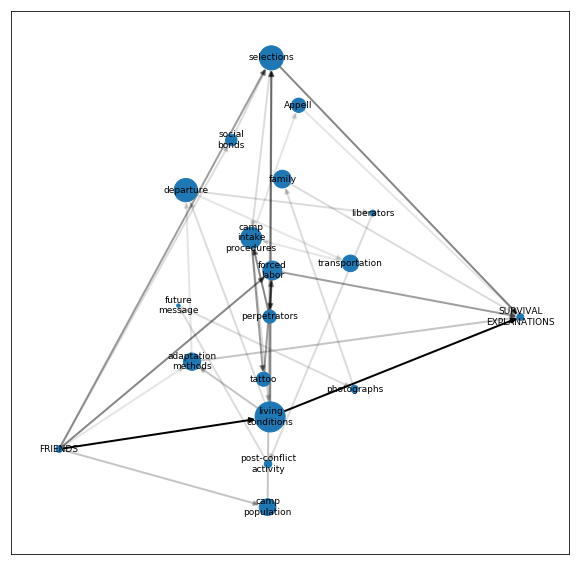

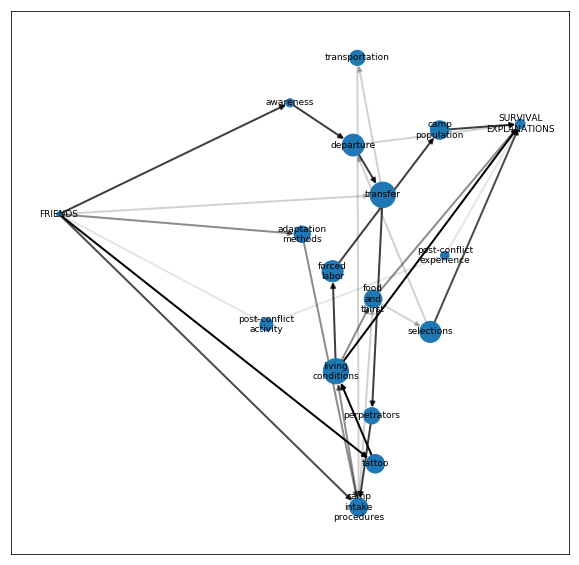

In [201]:
story_start = 'friends'
story_end = 'survival explanations'
flux = 0.25
visualize_most_important_paths(data_set_2_w,flux,features_df_2,story_start,story_end,None)
visualize_most_important_paths(data_set_2_m,flux,features_df_2,story_start,story_end,None)

## Observation 7

In [ ]:
## Qualitative description

There is an important narrative path connecting friends with aid giving; this is going throug selection.

6 labels to show
11 labels to show


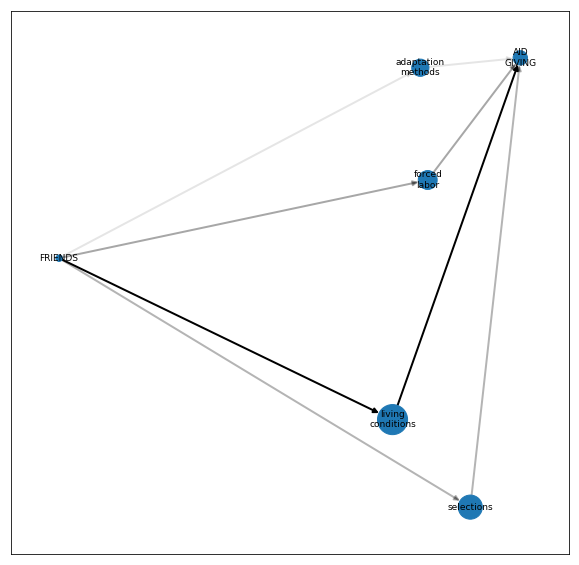

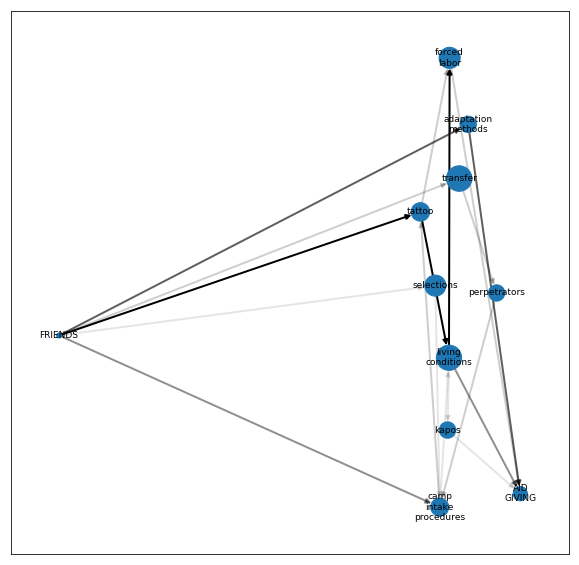

In [225]:
story_start = 'friends'
story_end = 'aid giving'
flux = 0.2
visualize_most_important_paths(data_set_2_w,flux,features_df_2,story_start,story_end,None)
visualize_most_important_paths(data_set_2_m,flux,features_df_2,story_start,story_end,None)

## Observation 8

### Qualitative Description

For women, the most important priming and exit topic of friendship is the discussion of living conditions; by contrast, the most important exit and priming topics for men is forced labour.

6 labels to show
10 labels to show


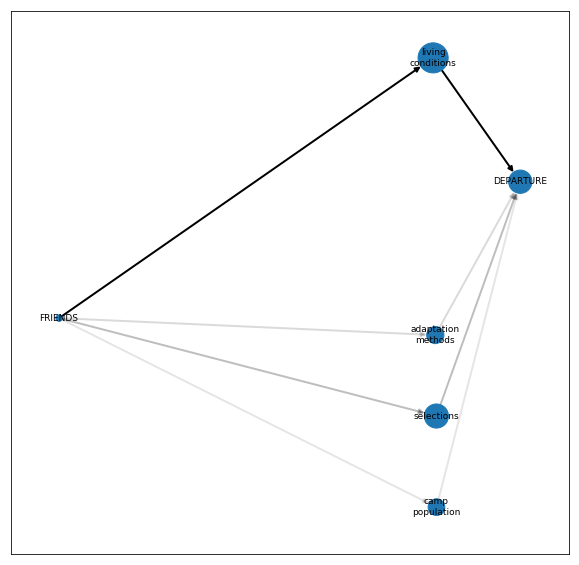

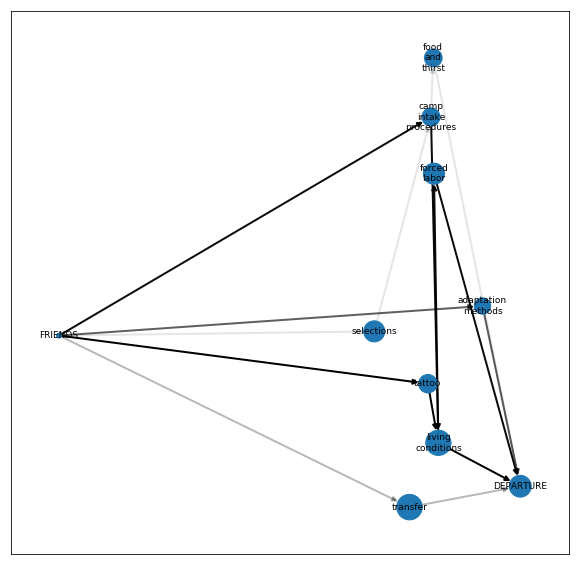

In [240]:
story_start = 'friends'
story_end = 'departure'
flux = 0.2
visualize_most_important_paths(data_set_2_w,flux,features_df_2,story_start,story_end,None)
visualize_most_important_paths(data_set_2_m,flux,features_df_2,story_start,story_end,None)

6 labels to show
8 labels to show


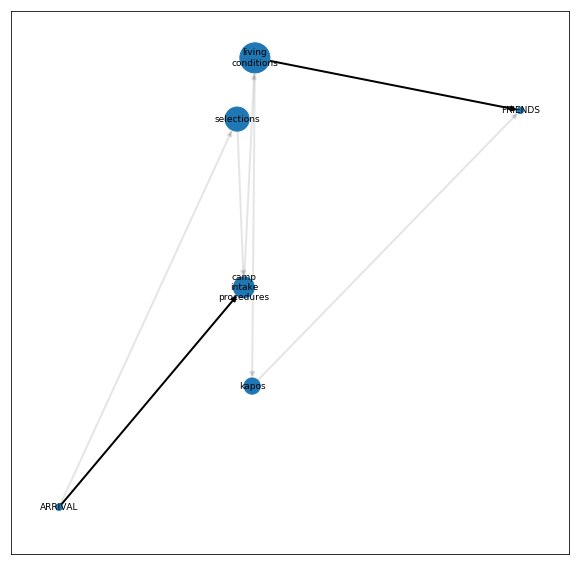

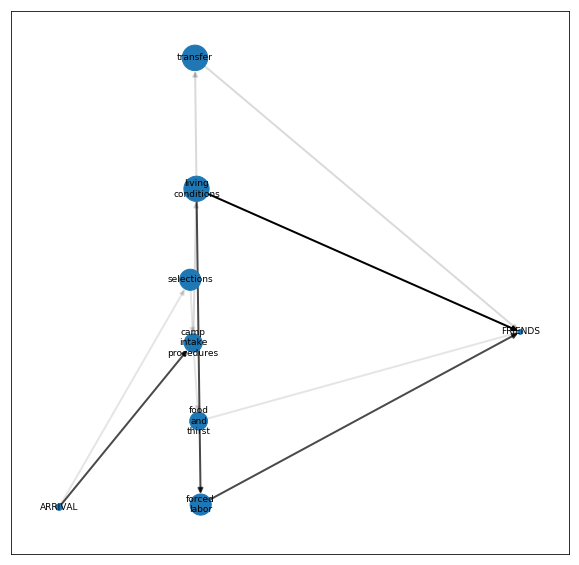

In [251]:
story_start = 'arrival'
story_end = 'friends'
flux = 0.15
visualize_most_important_paths(data_set_2_w,flux,features_df_2,story_start,story_end,None)
visualize_most_important_paths(data_set_2_m,flux,features_df_2,story_start,story_end,None)

## Observation 9

### Qualitative description

For women, food sharing concentrated on the barack; for men it concentrated on both the barrack and the forced labour activity;

### Visualization

8 labels to show
6 labels to show


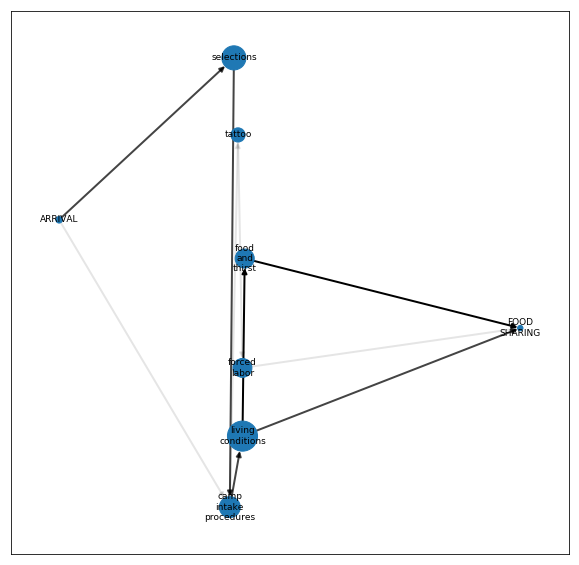

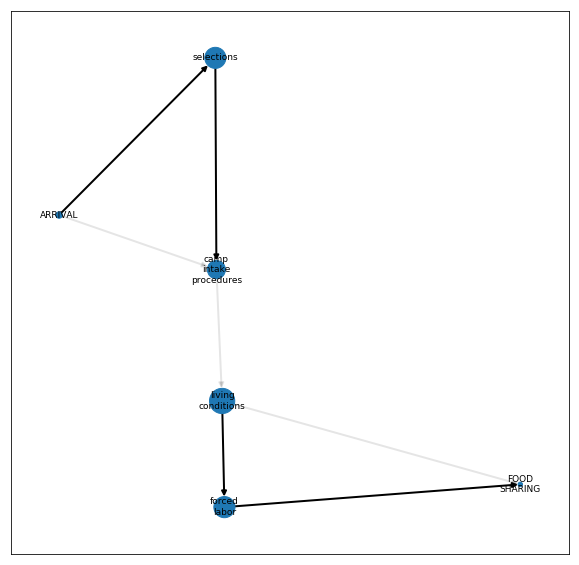

In [255]:
story_start = 'arrival'
story_end = 'food sharing'
flux = 0.17
visualize_most_important_paths(data_set_2_w,flux,features_df_2,story_start,story_end,None)
visualize_most_important_paths(data_set_2_m,flux,features_df_2,story_start,story_end,None)

8 labels to show
6 labels to show


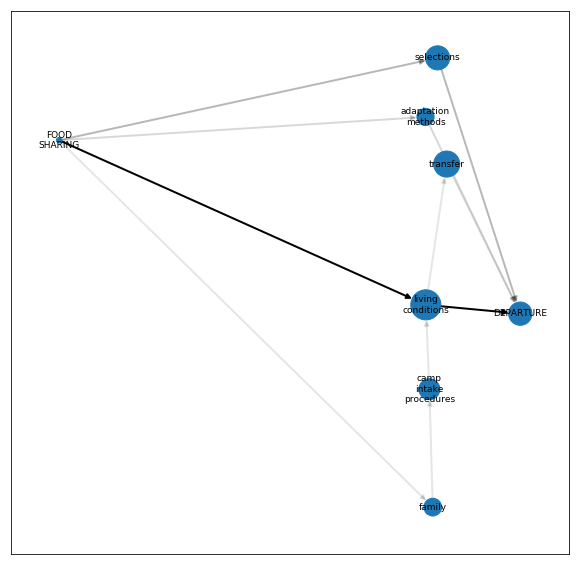

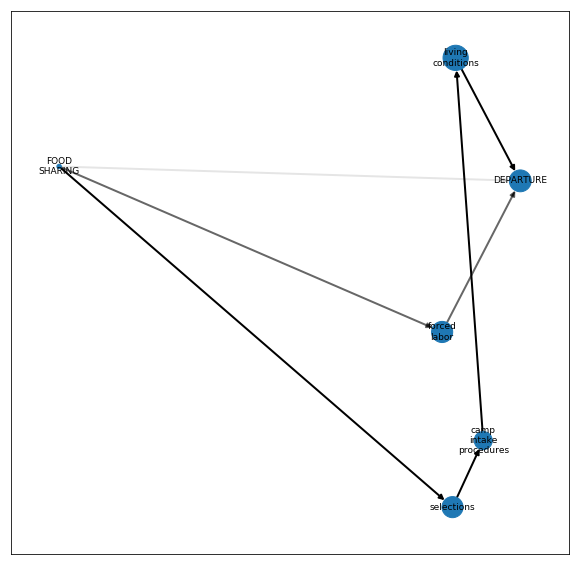

In [260]:
story_start = 'food sharing'
story_end = 'departure'
flux = 0.17
visualize_most_important_paths(data_set_2_w,flux,features_df_2,story_start,story_end,None)
visualize_most_important_paths(data_set_2_m,flux,features_df_2,story_start,story_end,None)

## Observation 10

### Qualitative Description:

Men and women discuss social bonds in the context of housing

6 labels to show
7 labels to show


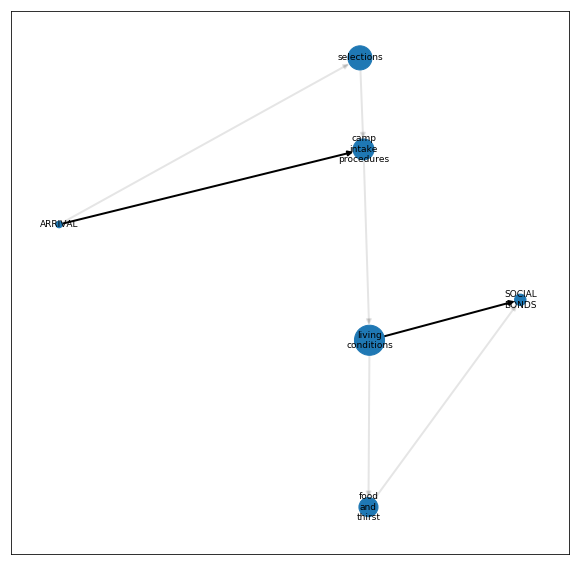

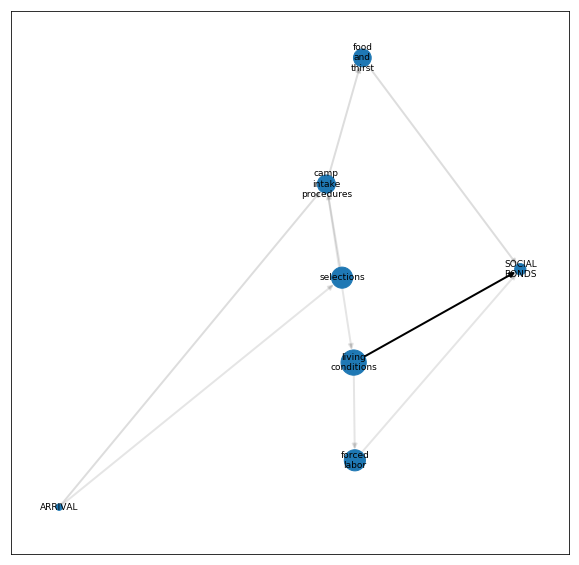

In [264]:
story_start = 'arrival'
story_end = 'social bonds'
flux = 0.2
visualize_most_important_paths(data_set_2_w,flux,features_df_2,story_start,story_end,None)
visualize_most_important_paths(data_set_2_m,flux,features_df_2,story_start,story_end,None)